# dt on colories and protains:


In [1]:
num_of_lines=400

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Demo_metabolic=pd.read_excel("C:/Users/97254/Downloads/Demo_metabolic.xlsx", engine='openpyxl')
Demo_patient_week1_23=pd.read_excel("C:/Users/97254/Downloads/Demo_patient_week1_23.12.xlsx", engine='openpyxl')
Demo_Patient_level_feeding_Daily_19 = pd.read_csv("C:/Users/97254/Downloads/Demo_Patient_level_feeding_Daily_19.11.csv",encoding='latin-1')

Demo_metabolic = pd.DataFrame(Demo_metabolic.iloc[:num_of_lines, :3])
dataap1 = pd.DataFrame(Demo_patient_week1_23.iloc[:num_of_lines, :1])
dataap2 = pd.DataFrame(Demo_patient_week1_23.iloc[:num_of_lines, 43:45])

#data2['Weight_adm']=data2['Weight_adm']/data2['Height']
#data2= pd.DataFrame(data2.iloc[:10, :2])

Demo_patient_week1_23=pd.concat([dataap1,dataap2],axis=1)

Demo_patient_week1_23.head()

,patient_id,LOS,outcome1
0,0001F70C-AA4C-46CC-8386-9A4D778B26BA,18.0,No
1,002B9175-E697-4308-904F-243B4074C224,9.0,No
2,002E7282-9C02-4D5C-8D3B-DDA2574ABCEF,5.0,No
3,0030B684-28EE-4076-B8D1-B0CEDB9413F3,2.0,No
4,004E2D79-7F96-431B-AA0E-3A6D5B90097D,4.0,No


In [3]:
Demo_Patient_level_feeding_Daily_19 = pd.DataFrame(Demo_Patient_level_feeding_Daily_19.iloc[:num_of_lines, :])
#data.head()

#merg by id
mer=pd.merge(Demo_metabolic,Demo_Patient_level_feeding_Daily_19,left_on='patient_id',right_on='patient_id',how='left')
mer.head()

,patient_id,Weight_adm,Height,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7
0,9A4D778B26BA,120.0,2.00,635.580000,33.858000,1540.800000,82.080000,1540.800000,82.080000,1540.800000,82.080000,1540.800000,82.080000,1878.55,88.891,1526.40,57.6,1526.40000,57.600000
1,243B4074C224,65.0,1.65,983.200008,65.546667,1253.600016,83.573334,1620.000000,108.000000,1021.200036,68.080002,1431.000000,95.400000,1440.00,96.000,1440.00,96.0,1440.00000,96.000000
2,DDA2574ABCEF,101.0,1.75,1209.600024,80.640002,0.000000,0.000000,1359.710689,66.328712,1878.261696,125.217446,643.043760,42.869584,0.00,0.000,0.00,0.0,0.00000,0.000000
3,B0CEDB9413F3,85.0,1.65,1261.400000,47.600000,337.080000,12.720000,36.746660,1.386666,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.00,0.0,0.00000,0.000000
4,3A6D5B90097D,70.0,1.75,1114.186815,40.269895,1946.950636,96.729665,1896.193822,100.402857,1970.866173,76.641677,432.479894,16.319996,0.00,0.000,1290.02,58.3,134.97333,5.653333


In [4]:
#onley kcal_day and protein_day
mer2 = pd.DataFrame(mer.iloc[:,3 :])

# normelize and concat

for col in mer2.columns:
    mer2[col] = mer2[col]/mer['Weight_adm']
    
mer = mer.iloc[:, :1]
lest=pd.concat([mer,mer2],axis=1)
lest.head()

,patient_id,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7
0,9A4D778B26BA,5.296500,0.282150,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,15.654583,0.740758,12.720000,0.480000,12.720000,0.480000
1,243B4074C224,15.126154,1.008410,19.286154,1.285744,24.923077,1.661538,15.710770,1.047385,22.015385,1.467692,22.153846,1.476923,22.153846,1.476923,22.153846,1.476923
2,DDA2574ABCEF,11.976238,0.798416,0.000000,0.000000,13.462482,0.656720,18.596650,1.239777,6.366770,0.424451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,B0CEDB9413F3,14.840000,0.560000,3.965647,0.149647,0.432314,0.016314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3A6D5B90097D,15.916955,0.575284,27.813581,1.381852,27.088483,1.434327,28.155231,1.094881,6.178284,0.233143,0.000000,0.000000,18.428857,0.832857,1.928190,0.080762


In [5]:
Demo_patient_week1_23=Demo_patient_week1_23.rename(columns={'patient_id':'patient_id2'},inplace = False)
#dataap.head()

lest=pd.concat([lest,Demo_patient_week1_23],axis=1)
lest.drop('patient_id2',
  axis='columns', inplace=True)
lest.head()

,patient_id,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7,LOS,outcome1
0,9A4D778B26BA,5.296500,0.282150,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,15.654583,0.740758,12.720000,0.480000,12.720000,0.480000,18.0,No
1,243B4074C224,15.126154,1.008410,19.286154,1.285744,24.923077,1.661538,15.710770,1.047385,22.015385,1.467692,22.153846,1.476923,22.153846,1.476923,22.153846,1.476923,9.0,No
2,DDA2574ABCEF,11.976238,0.798416,0.000000,0.000000,13.462482,0.656720,18.596650,1.239777,6.366770,0.424451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,No
3,B0CEDB9413F3,14.840000,0.560000,3.965647,0.149647,0.432314,0.016314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,No
4,3A6D5B90097D,15.916955,0.575284,27.813581,1.381852,27.088483,1.434327,28.155231,1.094881,6.178284,0.233143,0.000000,0.000000,18.428857,0.832857,1.928190,0.080762,4.0,No


In [35]:
lest=lest.dropna(how='all')
lest2=lest.loc[:, ::2]
lest2['LOS'] = Demo_patient_week1_23['LOS'] 
lest.head()

,patient_id,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7,LOS,outcome1
0,254,5.296500,0.282150,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,15.654583,0.740758,12.720000,0.480000,12.720000,0.480000,18.0,0
1,63,15.126154,1.008410,19.286154,1.285744,24.923077,1.661538,15.710770,1.047385,22.015385,1.467692,22.153846,1.476923,22.153846,1.476923,22.153846,1.476923,9.0,0
2,353,11.976238,0.798416,0.000000,0.000000,13.462482,0.656720,18.596650,1.239777,6.366770,0.424451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,0
3,286,14.840000,0.560000,3.965647,0.149647,0.432314,0.016314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0
4,104,15.916955,0.575284,27.813581,1.381852,27.088483,1.434327,28.155231,1.094881,6.178284,0.233143,0.000000,0.000000,18.428857,0.832857,1.928190,0.080762,4.0,0


In [36]:
lest2=lest2[lest2['LOS']>6.0]
lest2.head()

,patient_id,protein_day0,protein_day1,protein_day2,protein_day3,protein_day4,protein_day5,protein_day6,protein_day7,outcome1,LOS
0,254,0.282150,0.684000,0.684000,0.684000,0.684000,0.740758,0.480000,0.480000,0,18.0
1,63,1.008410,1.285744,1.661538,1.047385,1.467692,1.476923,1.476923,1.476923,0,9.0
5,346,1.059200,1.536000,1.536000,1.434667,1.536000,1.536000,1.536000,1.536000,0,23.0
7,236,0.788889,1.600000,1.600000,1.600000,1.600000,1.273333,0.000000,0.000000,0,26.0
8,295,0.541177,0.677647,0.677647,0.677647,0.677647,0.732549,0.903529,0.903529,0,8.0


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lest.outcome1 = le.fit_transform(lest.outcome1)
lest.patient_id = le.fit_transform(lest.patient_id)

In [7]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
lest0=clean_dataset(lest)
lest0.head()

,patient_id,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7,LOS,outcome1
0,254.0,5.296500,0.282150,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,15.654583,0.740758,12.720000,0.480000,12.720000,0.480000,18.0,0.0
1,63.0,15.126154,1.008410,19.286154,1.285744,24.923077,1.661538,15.710770,1.047385,22.015385,1.467692,22.153846,1.476923,22.153846,1.476923,22.153846,1.476923,9.0,0.0
2,353.0,11.976238,0.798416,0.000000,0.000000,13.462482,0.656720,18.596650,1.239777,6.366770,0.424451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,0.0
3,286.0,14.840000,0.560000,3.965647,0.149647,0.432314,0.016314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.0
4,104.0,15.916955,0.575284,27.813581,1.381852,27.088483,1.434327,28.155231,1.094881,6.178284,0.233143,0.000000,0.000000,18.428857,0.832857,1.928190,0.080762,4.0,0.0


In [8]:
x = lest0.iloc[:,1:18]   # Second column until the last column
y = lest0.iloc[:,18]    # First column (Survived) is our target
from sklearn.model_selection import train_test_split
#this function randomly split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)
#test_size=.3 means that our test set will be 30% of the train set.
x_train.head()

,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7,LOS
218,15.971556,0.676667,3.288889,0.197333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,4.0
4,15.916955,0.575284,27.813581,1.381852,27.088483,1.434327,28.155231,1.094881,6.178284,0.233143,0.0,0.0,18.428857,0.832857,1.92819,0.080762,4.0
266,16.877707,0.610009,14.543252,0.525635,8.591957,0.310538,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,3.0
68,6.029091,0.401939,10.472727,0.698182,0.916364,0.061091,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,21.0
387,16.656000,0.740267,22.480000,0.999111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,12.0


In [9]:
x.shape

(305, 17)

# DecisionTreeClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)  #train parameters: features and target
pred = dtree.predict(x_test)  #parameter: new data to predict

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)
#parameters: targets to be predicted and predictions from new data used before

0.6630434782608695

In [12]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=gini', accuracy_score(y_test, pred))
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=entropy', accuracy_score(y_test, pred))

Criterion=gini 0.6847826086956522
Criterion=entropy 0.7065217391304348


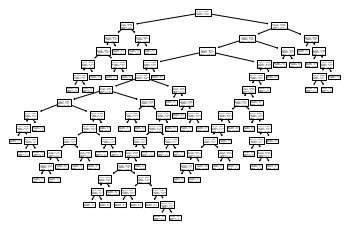

In [29]:
from sklearn import tree
tree.plot_tree(dtree);

explore by depth

In [13]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,20):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters

In [28]:
d.head(20)

,acc_gini,acc_entropy,max_depth
0,0.829787,0.829787,1
1,0.829787,0.829787,2
2,0.787234,0.829787,3
3,0.765957,0.744681,4
4,0.787234,0.765957,5
5,0.787234,0.765957,6
6,0.787234,0.702128,7
7,0.723404,0.723404,8
8,0.702128,0.702128,9
9,0.659574,0.680851,10


In [14]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
accuracy_score(y_test, pred)
#Accuracy: 0.814

0.8586956521739131

# RandomForestClassifier

In [15]:
	
from sklearn.ensemble import RandomForestClassifier

In [16]:
clf_4 = RandomForestClassifier()
clf_4.fit(x_train, y_train)
 #x_train, x_test, y_train, y_test
# Predict on training set
pred_y_4 = clf_4.predict(x_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_4) )
# 0.9744
 

[0. 1.]
0.8260869565217391


# imbalanced-learn

In [17]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\97254\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(x, y)

print(f'''Shape of X before SMOTE: {x.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (305, 17)
Shape of X after SMOTE: (498, 17)

Balance of positive and negative classes (%):


1.0    50.0
0.0    50.0
Name: outcome1, dtype: float64

In [20]:
X_sm.shape

(498, 17)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=.3)


In [22]:
dtree.fit(x_train, y_train)  #train parameters: features and target
pred = dtree.predict(x_test)  #parameter: new data to predict

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.4866666666666667

In [24]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=gini', accuracy_score(y_test, pred))
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=entropy', accuracy_score(y_test, pred))

Criterion=gini 0.6933333333333334
Criterion=entropy 0.7466666666666667


In [25]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,20):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters

In [26]:
d.head(20)

,acc_gini,acc_entropy,max_depth
0,0.486667,0.486667,1
1,0.466667,0.466667,2
2,0.493333,0.493333,3
3,0.526667,0.526667,4
4,0.553333,0.573333,5
5,0.606667,0.626667,6
6,0.640000,0.666667,7
7,0.660000,0.733333,8
8,0.666667,0.700000,9
9,0.653333,0.713333,10


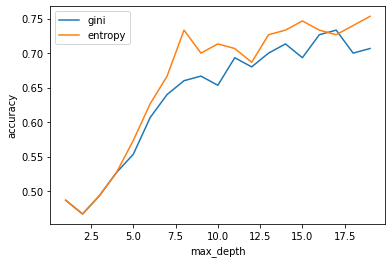

In [38]:
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [33]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=8)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
accuracy_score(y_test, pred)


0.7333333333333333

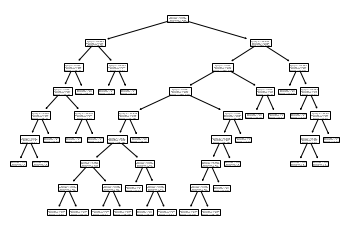

In [32]:
from sklearn import tree
tree.plot_tree(dtree);

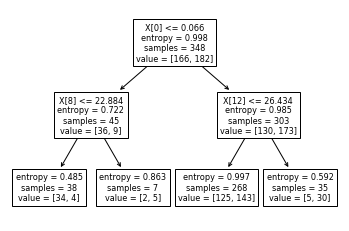

In [34]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
accuracy_score(y_test, pred)
from sklearn import tree
tree.plot_tree(dtree);

RandomForestClassifier again:

In [28]:
clf_4 = RandomForestClassifier()
clf_4.fit(x_train, y_train)
 #x_train, x_test, y_train, y_test
# Predict on training set
pred_y_4 = clf_4.predict(x_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_4) )
# 0.9744
 

[0. 1.]
0.8533333333333334
